In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import combinations
from statsmodels.tsa.stattools import adfuller

In [8]:
minimumAdv = 10

In [9]:
tpxData = pd.read_csv('TPX_prices.csv', index_col=0, parse_dates=True)
# tpxData

In [10]:
tpxData = tpxData.dropna(axis='columns')
# tpxData

In [11]:
tpxUniverseData = pd.read_excel('TPX Universe.xlsx')
# tpxUniverseData

In [12]:
tickersName = tpxData.columns

In [13]:
for tickers in tickersName:
    if (tpxUniverseData.loc[tpxUniverseData['Ticker'] == tickers]['Avg of Daily Equity Traded Val over 3 Months'] < minimumAdv).bool():
        tpxData = tpxData.drop([tickers], axis=1)

/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_19865/4153440384.py:2: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  if (tpxUniverseData.loc[tpxUniverseData['Ticker'] == tickers]['Avg of Daily Equity Traded Val over 3 Months'] < minimumAdv).bool():
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_19865/4153440384.py:2: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  if (tpxUniverseData.loc[tpxUniverseData['Ticker'] == tickers]['Avg of Daily Equity Traded Val over 3 Months'] < minimumAdv).bool():
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_19865/4153440384.py:2: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  if (tpxUniverseData.loc[tpxUniverseData['Ticker'] == tickers]['Avg of Daily Equity Traded Val over 3 Months'] < minimumAdv).bool():
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_19865/41534403

In [14]:
instrumentList = list(tpxData.columns)
pair_list = list(sorted(map(sorted, combinations(set(instrumentList), 2))))
len(pair_list)

63190

In [15]:
pair_list

[['1332 JP Equity', '1514 JP Equity'],
 ['1332 JP Equity', '1605 JP Equity'],
 ['1332 JP Equity', '1662 JP Equity'],
 ['1332 JP Equity', '1721 JP Equity'],
 ['1332 JP Equity', '1801 JP Equity'],
 ['1332 JP Equity', '1802 JP Equity'],
 ['1332 JP Equity', '1803 JP Equity'],
 ['1332 JP Equity', '1808 JP Equity'],
 ['1332 JP Equity', '1812 JP Equity'],
 ['1332 JP Equity', '1878 JP Equity'],
 ['1332 JP Equity', '1911 JP Equity'],
 ['1332 JP Equity', '1925 JP Equity'],
 ['1332 JP Equity', '1928 JP Equity'],
 ['1332 JP Equity', '1944 JP Equity'],
 ['1332 JP Equity', '1959 JP Equity'],
 ['1332 JP Equity', '1963 JP Equity'],
 ['1332 JP Equity', '1969 JP Equity'],
 ['1332 JP Equity', '2002 JP Equity'],
 ['1332 JP Equity', '2127 JP Equity'],
 ['1332 JP Equity', '2181 JP Equity'],
 ['1332 JP Equity', '2212 JP Equity'],
 ['1332 JP Equity', '2222 JP Equity'],
 ['1332 JP Equity', '2267 JP Equity'],
 ['1332 JP Equity', '2269 JP Equity'],
 ['1332 JP Equity', '2282 JP Equity'],
 ['1332 JP Equity', '2371

In [16]:
# (tpxData.pct_change()+1).cumprod().plot(figsize=(25, 20), legend=False)

# plt.ylabel("Percentage Change")
# plt.show()

In [17]:
def findHedgeRatio(x, y):
    """
    Calculates the hedge ratio between two variables.

    Parameters:
    x: panda dataframe timeseries for instrument A
    y: panda dataframe timeseries for instrument B

    Returns:
    float: The hedge ratio.

    """
    model = sm.OLS(x, sm.add_constant(y)).fit()
    return model.params

In [18]:
# def findSpread(x, y):
#     """
#     Calculates the spread between two variables.

#     Parameters:
#     x: panda dataframe timeseries for instrument A
#     y: panda dataframe timeseries for instrument B

#     Returns:
#     panda dataframe: The spread between the two instruments.

#     """
#     hedgeRatio = findHedgeRatio(x, y)
#     spread = x - hedgeRatio * y
#     return spread

In [19]:
def ADFisStionaryTest(spread):
    """
    Augmented Dickey-Fuller test for stationarity.

    Parameters:
    spread: panda dataframe timeseries

    Returns:
    True if pair is stationary
    False if pair is not stationary
    """
    result = adfuller(spread, maxlag=1)
    # print('ADF Statistic: %f' % result[0])
    # print('p-value: %f' % result[1])
    # print('Critical Values:')
    # for key, value in result[4].items():
    #     print('\t%s: %.3f' % (key, value))
    if (result[0] < result[4]['1%']):
        return True
    else:
        return False

In [20]:
validPairsList = []

### Find valid pairs and its spread

In [21]:
validPairs = pd.DataFrame()
for pair in pair_list:
    dfSpread = pd.DataFrame()
    hedgeRatioParams = findHedgeRatio(tpxData[pair[0]], tpxData[pair[1]])
    dfSpread['spread'] = tpxData[pair[0]] - hedgeRatioParams[1] * tpxData[pair[1]] - hedgeRatioParams[0]
    adfResult = ADFisStionaryTest(dfSpread.spread)
    if adfResult == True:
        validPairs[f'spread_{pair[0]}_{pair[1]}'] = dfSpread['spread']
        validPairsList.append(pair)
    # else:
        # print(f"{pair[0]} and {pair[1]} pair is not stationary")

/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_19865/2265232203.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfSpread['spread'] = tpxData[pair[0]] - hedgeRatioParams[1] * tpxData[pair[1]] - hedgeRatioParams[0]
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_19865/2265232203.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfSpread['spread'] = tpxData[pair[0]] - hedgeRatioParams[1] * tpxData[pair[1]] - hedgeRatioParams[0]
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_19865/2265232203.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a fut

In [22]:
valid = validPairs
# valid = pd.read_csv('validPairs3.csv', index_col=0, parse_dates=True)
valid

,spread_1332 JP Equity_1514 JP Equity,spread_1332 JP Equity_1802 JP Equity,spread_1332 JP Equity_1925 JP Equity,spread_1332 JP Equity_1959 JP Equity,spread_1332 JP Equity_3778 JP Equity,spread_1332 JP Equity_4578 JP Equity,spread_1514 JP Equity_1605 JP Equity,spread_1514 JP Equity_1662 JP Equity,spread_1514 JP Equity_1721 JP Equity,spread_1514 JP Equity_1801 JP Equity,...,spread_9602 JP Equity_9684 JP Equity,spread_9602 JP Equity_9719 JP Equity,spread_9603 JP Equity_9697 JP Equity,spread_9684 JP Equity_9843 JP Equity,spread_9684 JP Equity_9962 JP Equity,spread_9697 JP Equity_9983 JP Equity,spread_9719 JP Equity_9766 JP Equity,spread_9719 JP Equity_9861 JP Equity,spread_9735 JP Equity_9843 JP Equity,spread_9735 JP Equity_9861 JP Equity
Date,,,,,,,,,,,,,,,,,,,,,
1/1/2013,-308.074057,-34.790994,-1.166333,-68.340595,-269.518948,13.798589,-97.048839,-103.632830,89.376078,108.380669,...,-493.807673,-100.627553,-1732.572918,-211.251101,-672.039185,358.257603,-503.681068,-412.387571,-1704.203302,-2209.337779
2/1/2013,-308.074057,-34.790994,-1.166333,-68.340595,-269.518948,13.798589,-97.048839,-103.632830,89.376078,108.380669,...,-493.807673,-100.627553,-1732.572918,-211.251101,-672.039185,358.257603,-503.681068,-412.387571,-1704.203302,-2209.337779
3/1/2013,-308.074057,-34.790994,-1.166333,-68.340595,-269.518948,13.798589,-97.048839,-103.632830,89.376078,108.380669,...,-493.807673,-100.627553,-1732.572918,-211.251101,-672.039185,358.257603,-503.681068,-412.387571,-1704.203302,-2209.337779
4/1/2013,-303.533256,-35.114905,-11.786750,-64.173387,-264.975229,10.865337,-100.727097,-92.632573,89.134757,106.053942,...,-497.250505,-113.483180,-1774.573204,-220.504951,-697.413372,350.462463,-497.473525,-411.943293,-1690.481085,-2199.168069
7/1/2013,-309.288452,-36.931814,-9.996489,-66.132397,-268.225097,7.144132,-81.629274,-84.632687,106.479446,117.573194,...,-500.807673,-125.338808,-1722.073634,-214.002384,-674.171926,336.596029,-485.469770,-414.232449,-1671.295896,-2199.896534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/5/2024,106.744011,-116.780522,165.521991,55.969263,-116.708442,66.838794,540.178316,538.347169,1075.626706,1018.361880,...,883.998290,-1235.719874,9.388677,-575.865600,47.940812,-219.717113,-1.567861,471.895552,940.257014,-143.850763
28/5/2024,90.467222,-138.198755,157.238535,-2.802389,-119.976533,58.138794,558.414844,559.346827,1110.868027,1036.939457,...,979.328596,-1118.387168,-13.314384,-611.225844,-187.393415,-258.814683,-58.011195,462.085307,929.321849,-127.733252
29/5/2024,86.535194,-143.048156,152.849947,-8.342439,-119.462513,44.853853,467.626153,461.346314,1039.833312,959.823942,...,925.018244,-1196.283337,-19.671283,-666.930931,-279.981335,-167.967049,-177.039264,443.985906,904.562654,-190.344206


In [23]:
# validPairs.to_csv("validPairs3.csv")

In [24]:
# valid[valid['Date'].str.contains("2021")]

### Strategy

Enter when price goes above 1 std.

Cut loss when price goes above 2 std.

Take profit when spread goes to 0 or change sign.


In [25]:
rollingWindow = 262
cutLossSd = 2

In [26]:
pairsOutcome = {}

In [37]:
for pair in validPairsList:
    df = pd.DataFrame()

    #Calculate Standard Deviations
    df['spread'] = valid[f'spread_{pair[0]}_{pair[1]}']
    df['mid'] =  df['spread'].rolling(rollingWindow).mean()
    df['1sd high'] = df['spread'].rolling(rollingWindow).mean() + df['spread'].rolling(rollingWindow).std()
    df['1sd low'] = df['spread'].rolling(rollingWindow).mean() - df['spread'].rolling(rollingWindow).std()
    df['2sd high'] = df['spread'].rolling(rollingWindow).mean() + df['spread'].rolling(rollingWindow).std() * cutLossSd
    df['2sd low'] = df['spread'].rolling(rollingWindow).mean() - df['spread'].rolling(rollingWindow).std() * cutLossSd
    df['position'] = 0

    return_df = (tpxData / tpxData.shift(1)) - 1

    df.loc[(df['spread'] > df['1sd high']) & (df['spread'] < df['2sd high']), 'position'] = -1
    df.loc[(df['spread'] < df['1sd low']) & (df['spread'] > df['2sd low']), 'position'] = 1

    #Calculate PnL
    df[f'{pair[0]} position'] = df['position']
    df[f'{pair[1]} position'] = df['position'] * -1
    df['dailypnl'] = df[f'{pair[1]} position']*return_df[f'{pair[1]}'].shift(-1) + df[f'{pair[0]} position']*return_df[f'{pair[0]}'].shift(-1)
    df['cumpnl'] = df['dailypnl'].cumsum()

    pairsOutcome[f'{pair[0]} {pair[1]}'] = df


In [57]:
# pairsOutcome['1332 JP Equity 1925 JP Equity'].loc[pairsOutcome['1332 JP Equity 1925 JP Equity']['position'] == 1]
pairsOutcome['6326 JP Equity 8750 JP Equity'].loc[pairsOutcome['6326 JP Equity 8750 JP Equity']['position'] == 1]

,spread,mid,1sd high,1sd low,2sd high,2sd low,position,6326 JP Equity position,8750 JP Equity position,dailypnl,cumpnl
Date,,,,,,,,,,,
14/2/2014,-248.712975,-115.289497,5.003984,-235.582977,125.297465,-355.876458,1,1,-1,-0.013981,-0.011681
17/2/2014,-265.942493,-114.302000,3.657297,-232.261296,121.616593,-350.220592,1,1,-1,0.005396,-0.006285
18/2/2014,-236.899960,-113.260280,2.374903,-228.895462,118.010086,-344.530645,1,1,-1,0.003421,-0.002864
19/2/2014,-237.549117,-112.238169,1.078364,-225.554701,114.394896,-338.871234,1,1,-1,0.016279,0.013415
20/2/2014,-239.470325,-111.300653,-0.084142,-222.517164,111.132369,-333.733675,1,1,-1,0.000577,0.013992
...,...,...,...,...,...,...,...,...,...,...,...
17/5/2024,-298.468163,-154.796185,-26.071781,-283.520590,102.652624,-412.244994,1,1,-1,-0.007321,1.497470
20/5/2024,-301.640448,-155.484675,-26.458306,-284.511045,102.568064,-413.537415,1,1,-1,-0.012103,1.485367
21/5/2024,-333.560087,-156.423241,-26.998398,-285.848084,102.426445,-415.272927,1,1,-1,-0.033154,1.452213


In [56]:
validPairsList[2800]

['6326 JP Equity', '8750 JP Equity']

In [95]:
pairOne = 3003
pairTwo = 6254

Text(0.5, 1.0, '3003 JP Equity and 6254 JP Equity pair trade')

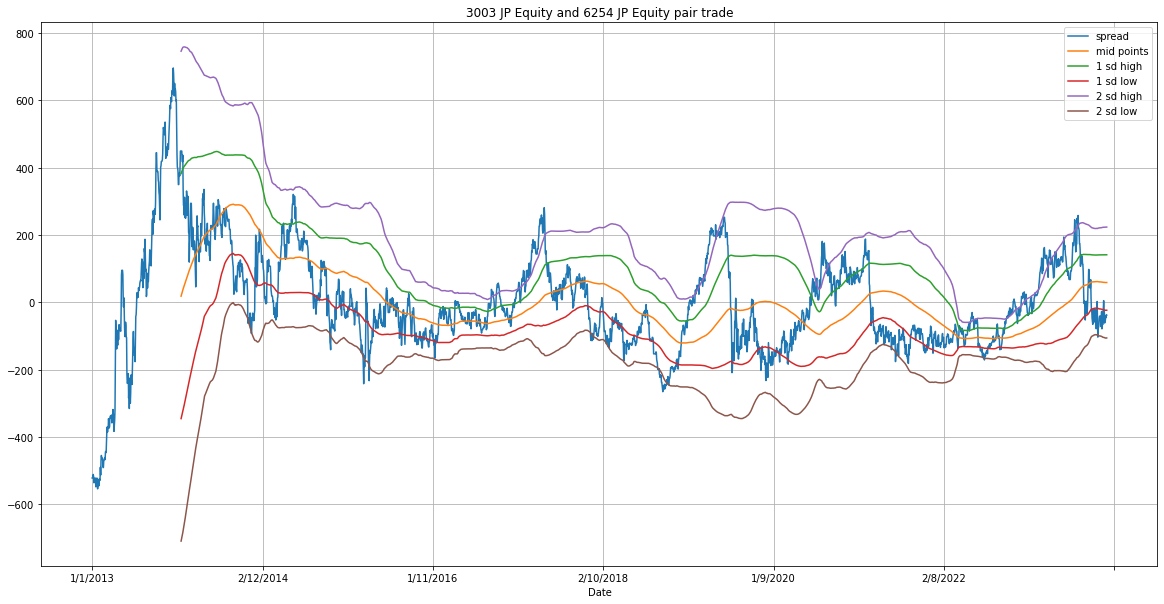

In [97]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['spread'].plot(ax=ax1, label='spread', legend=True, grid=True, sharex=True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['mid'].plot(ax=ax1, label='mid points', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['1sd high'].plot(ax=ax1, label='1 sd high', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['1sd low'].plot(ax=ax1, label='1 sd low', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['2sd high'].plot(ax=ax1, label='2 sd high', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['2sd low'].plot(ax=ax1, label='2 sd low', legend=True, grid=True, sharex= True)
plt.title(f"{pairOne} JP Equity and {pairTwo} JP Equity pair trade")
# df['position'].plot(ax=ax1, label='positions', legend=True, grid=True, style='x')
# df['cumpnl'].plot(ax=ax1, label='Cumulative PNL', legend=True, grid=True, sharex= True)

In [32]:
# df.loc[df['position'] != 0, 'plotposition'] = df['cumpnl']

Text(0.5, 1.0, '3003 JP Equity and 6254 JP Equity pair trade cumulative PNL')

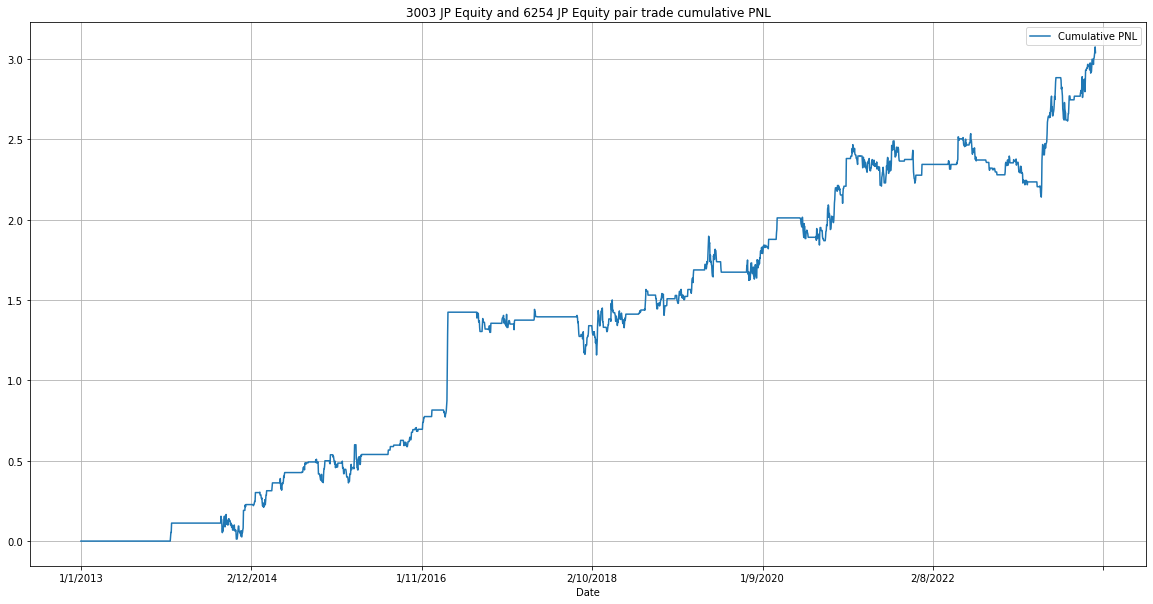

In [98]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['cumpnl'].plot(ax=ax1, label='Cumulative PNL', legend=True, grid=True, sharex= True)
plt.title(f"{pairOne} JP Equity and {pairTwo} JP Equity pair trade cumulative PNL")

In [60]:
import pickle 

with open('saved_result.pkl', 'wb') as f:
    pickle.dump(pairsOutcome, f)

In [61]:
with open('saved_result.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [64]:
loaded_dict['6326 JP Equity 8750 JP Equity'].loc[loaded_dict['6326 JP Equity 8750 JP Equity']['cumpnl'] > 1]

,spread,mid,1sd high,1sd low,2sd high,2sd low,position,6326 JP Equity position,8750 JP Equity position,dailypnl,cumpnl
Date,,,,,,,,,,,
3/6/2019,-7.090082,-94.234939,-21.349345,-167.120533,51.536248,-240.006126,-1,-1,1,0.011451,1.000702
4/6/2019,-11.845864,-94.082908,-21.066780,-167.099037,51.949348,-240.115165,-1,-1,1,0.004267,1.004969
5/6/2019,5.595042,-93.824552,-20.575421,-167.073683,52.673710,-240.322814,-1,-1,1,0.005623,1.010592
6/6/2019,2.967151,-93.529366,-20.046083,-167.012650,53.437201,-240.495934,-1,-1,1,-0.009587,1.001005
30/7/2019,17.013113,-77.334540,12.708750,-167.377829,102.752039,-257.421118,-1,-1,1,0.008180,1.001166
...,...,...,...,...,...,...,...,...,...,...,...
24/5/2024,-431.424062,-160.633502,-28.730314,-292.536689,103.172874,-424.439877,0,0,0,0.000000,1.442214
27/5/2024,-472.378393,-162.323133,-29.273323,-295.372942,103.776486,-428.422751,0,0,0,0.000000,1.442214
28/5/2024,-522.996582,-164.118715,-29.392100,-298.845330,105.334515,-433.571945,0,0,0,0.000000,1.442214


In [70]:
loaded_dict['6326 JP Equity 8750 JP Equity'].dropna()['cumpnl'][-1] > 1

/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_19865/3247538928.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  loaded_dict['6326 JP Equity 8750 JP Equity'].dropna()['cumpnl'][-1] > 1


True

In [91]:
cumpnlMoreThanOne = []

In [92]:
for x, y in loaded_dict.items():
  if (y.dropna()['cumpnl'][-1] > 1.5):
    cumpnlMoreThanOne.append(x)

/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_19865/3636946757.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (y.dropna()['cumpnl'][-1] > 1.5):


In [113]:
totalCumPnl = pd.DataFrame()
totalCumPnl['totalCumPnl'] = loaded_dict[cumpnlMoreThanOne[0]].dropna()['cumpnl']
for x in range(1, len(cumpnlMoreThanOne)):
    totalCumPnl['totalCumPnl'] += loaded_dict[cumpnlMoreThanOne[x]].dropna()['cumpnl'] 
totalCumPnl

,totalCumPnl
Date,
1/1/2014,0.000000
2/1/2014,0.000000
3/1/2014,1.033353
6/1/2014,1.671642
7/1/2014,1.346646
...,...
24/5/2024,715.580663
27/5/2024,715.506131
28/5/2024,715.374095


Text(0.5, 1.0, 'Top 379 cumulative PNL')

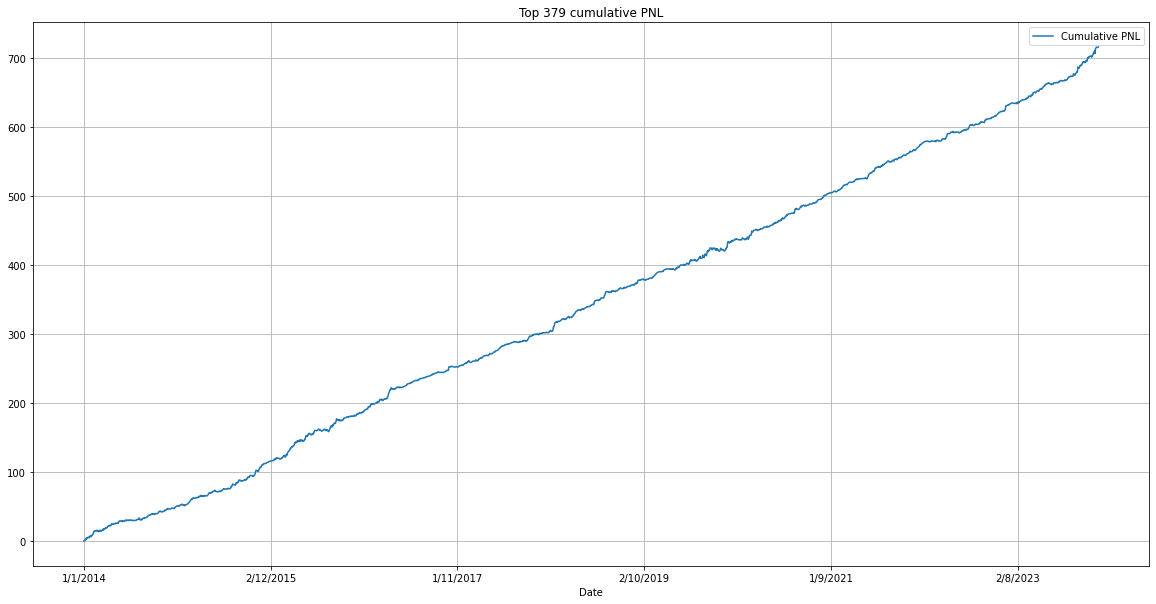

In [115]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
totalCumPnl['totalCumPnl'].plot(ax=ax1, label='Cumulative PNL', legend=True, grid=True, sharex= True)
plt.title(f"Top 379 cumulative PNL")